In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import locale
locale.setlocale(locale.LC_ALL, '')
%matplotlib inline
import seaborn as sns
import time

sns.set(style="whitegrid")
sns.set_color_codes()
sns.set_context("paper")
sns.set(rc={"font.size":18,"axes.labelsize":22})
sns.set(font_scale=1.7)

In [8]:
aspects = [
    'Apps for Android',
    'Amazon Instant Video',
    'Baby',
    'Beauty',
    'CDs and Vinyl',
    'Cell Phones and Accessories',
    'Clothing Shoes and Jewelry',
    'Digital Music',
    'Electronics',
    'Grocery and Gourmet Food',
    'Health and Personal Care',
    'Home and Kitchen',
    'Kindle Store',
    'Movies and TV',
    'Office Products',
    'Pet Supplies',
    'Sports and Outdoors',
    'Tools and Home Improvement',
    'Toys and Games',
    'Video Games',
    'Books',
    'Musical Instruments',
    'Automotive',
    'Patio, Lawn and Garden'
]

counts = [
    752937,
    37126,
    160792,
    198502,
    1097592,
    194439,
    278677,
    64706,
    1689188,
    151254,
    346355,
    551682,
    982619,
    1697533,
    53258,
    157836,
    296337,
    134476,
    167597,
    231780,
    8898041,
    10261,
    20473,
    13272,
]

d = {
    'category': aspects,
    'number of reviews': counts
}
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame(data=d)
df

,category,number of reviews
0,Apps for Android,752937
1,Amazon Instant Video,37126
2,Baby,160792
3,Beauty,198502
4,CDs and Vinyl,1097592
5,Cell Phones and Accessories,194439
6,Clothing Shoes and Jewelry,278677
7,Digital Music,64706
8,Electronics,1689188
9,Grocery and Gourmet Food,151254


In [9]:
df.describe()

,number of reviews
count,24.00
mean,757780.54
std,1802357.87
min,10261.00
25%,117033.50
50%,196470.50
75%,601995.75
max,8898041.00


In [10]:
print('All reviews: ' + str(sum(counts)))

All reviews: 18186733


In [11]:
book = df[df['category'] == 'Books']
book['number of reviews'] / sum(counts)
#print(f'Books category ratio: {}')

20   0.49
Name: number of reviews, dtype: float64

Text(0.5,1,'Amazon Reviews - Category Distribution')

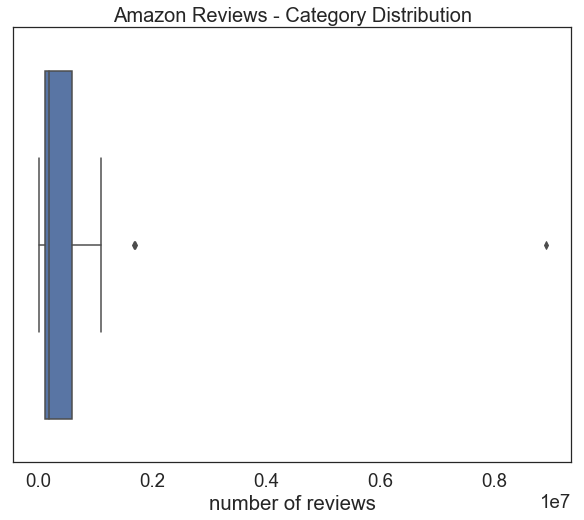

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x="number of reviews", data=df)
plt.title(f"Amazon Reviews - Category Distribution", fontsize=20) 

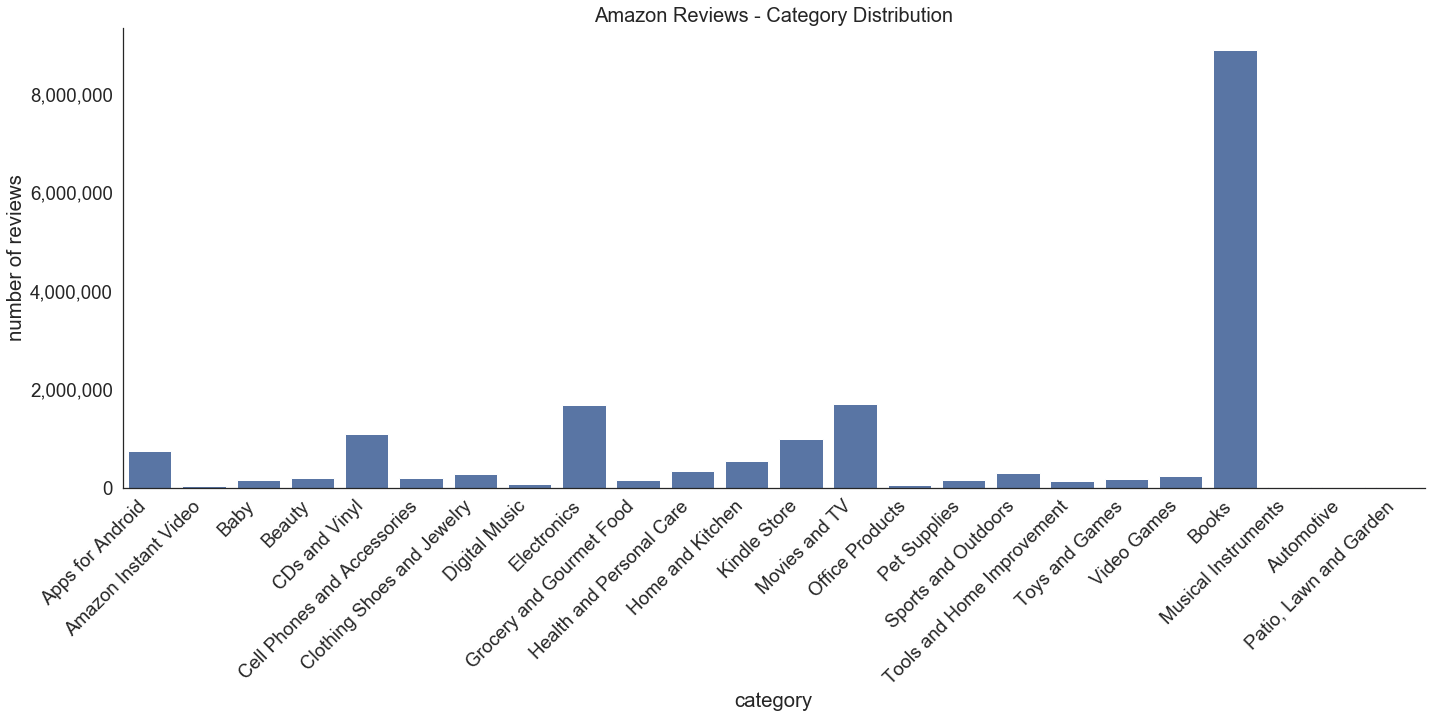

In [14]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df, color='b', x='category', y='number of reviews')
plt.title(f"Amazon Reviews - Category Distribution", fontsize=20) 
plt.xticks(rotation=45, ha="right")
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
p = os.path.join(os.getcwd(), 'Thesis', 'figures', '06_results', '05_amazonReviewsCategories.pdf')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
sns.despine()
plt.savefig(p)

# GermEval

In [15]:
path = os.path.join(os.getcwd(), 'data', 'data', 'germeval2017', 'stats', 'splits_and_aspects.csv')
df_s = pd.read_csv(path, sep=';')
df_s

,aspect,synchronic test,diachronic test,train,validation
0,Allgemein,1398.00,1024,12138,1475
1,Atmosphäre,148.00,53,1046,139
2,Auslastung_und_Platzangebot,35.00,20,251,33
3,Barrierefreiheit,9.00,2,64,17
4,Connectivity,36.00,73,257,23
5,DB_App_und_Website,28.00,18,185,23
6,Design,4.00,2,31,4
7,Gastronomisches_Angebot,3.00,3,44,4
8,Gepäck,2.00,6,18,3
9,Image,nan,3,51,7


In [16]:
print(df_s.to_latex(index=False, escape=False))

\begin{tabular}{lrrrr}
\toprule
                       aspect &  synchronic test &  diachronic test &  train &  validation \\
\midrule
                    Allgemein &          1398.00 &             1024 &  12138 &        1475 \\
                   Atmosphäre &           148.00 &               53 &   1046 &         139 \\
  Auslastung_und_Platzangebot &            35.00 &               20 &    251 &          33 \\
             Barrierefreiheit &             9.00 &                2 &     64 &          17 \\
                 Connectivity &            36.00 &               73 &    257 &          23 \\
           DB_App_und_Website &            28.00 &               18 &    185 &          23 \\
                       Design &             4.00 &                2 &     31 &           4 \\
      Gastronomisches_Angebot &             3.00 &                3 &     44 &           4 \\
                       Gepäck &             2.00 &                6 &     18 &           3 \\
                   

In [17]:
df_s.columns.values[1:]

array(['synchronic test', 'diachronic test', 'train', 'validation'],
      dtype=object)

In [18]:
# transform so that it works with seaborn
df = pd.DataFrame()
for _, r in df_s.iterrows():   
    if r['aspect'] == 'Allgemein':
        continue
    for split in df_s.columns.values[1:]:
        df = df.append({
            'Aspect': r['aspect'],
            'Samples': r[split],
            'Split': split
        }, ignore_index=True)
df

,Aspect,Samples,Split
0,Atmosphäre,148.00,synchronic test
1,Atmosphäre,53.00,diachronic test
2,Atmosphäre,1046.00,train
3,Atmosphäre,139.00,validation
4,Auslastung_und_Platzangebot,35.00,synchronic test
5,Auslastung_und_Platzangebot,20.00,diachronic test
6,Auslastung_und_Platzangebot,251.00,train
7,Auslastung_und_Platzangebot,33.00,validation
8,Barrierefreiheit,9.00,synchronic test
9,Barrierefreiheit,2.00,diachronic test


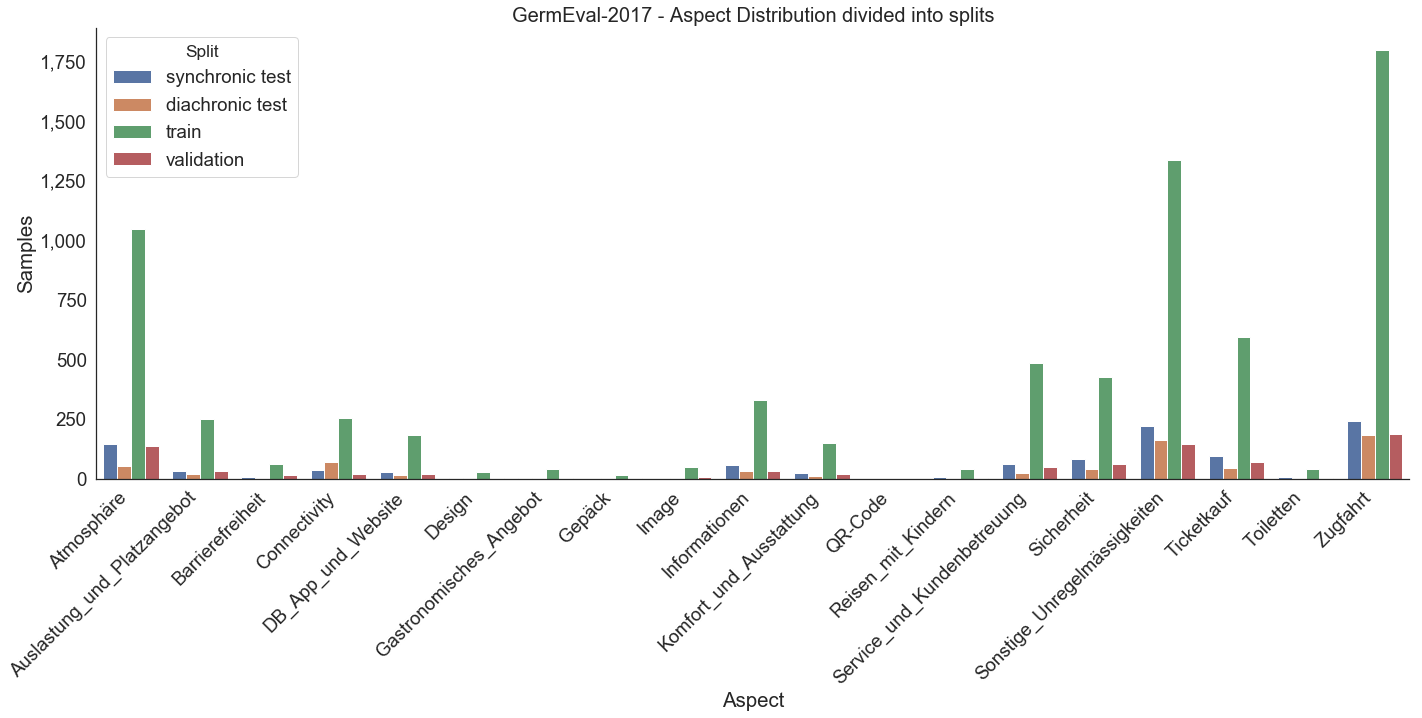

In [19]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df, hue='Split', x='Aspect', y='Samples')
plt.title(f"GermEval-2017 - Aspect Distribution divided into splits", fontsize=20) 
plt.xticks(rotation=45, ha="right")
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
p = os.path.join(os.getcwd(), 'Thesis', 'figures', '08_appendix', '08_germevalAspects.pdf')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
sns.despine()
plt.savefig(p)
plt.savefig(p)

In [6]:
target_sentiment_samples  = [1, 1, 2, 1.5]
target_sentiment_distribution_labels = ['a', 'b', 'c', 'd']
df_dict = {
    'Samples': target_sentiment_samples,
    'Aspect': target_sentiment_distribution_labels
}
df_test = pd.DataFrame(df_dict)
df_test

,Aspect,Samples
0,a,1.0
1,b,1.0
2,c,2.0
3,d,1.5


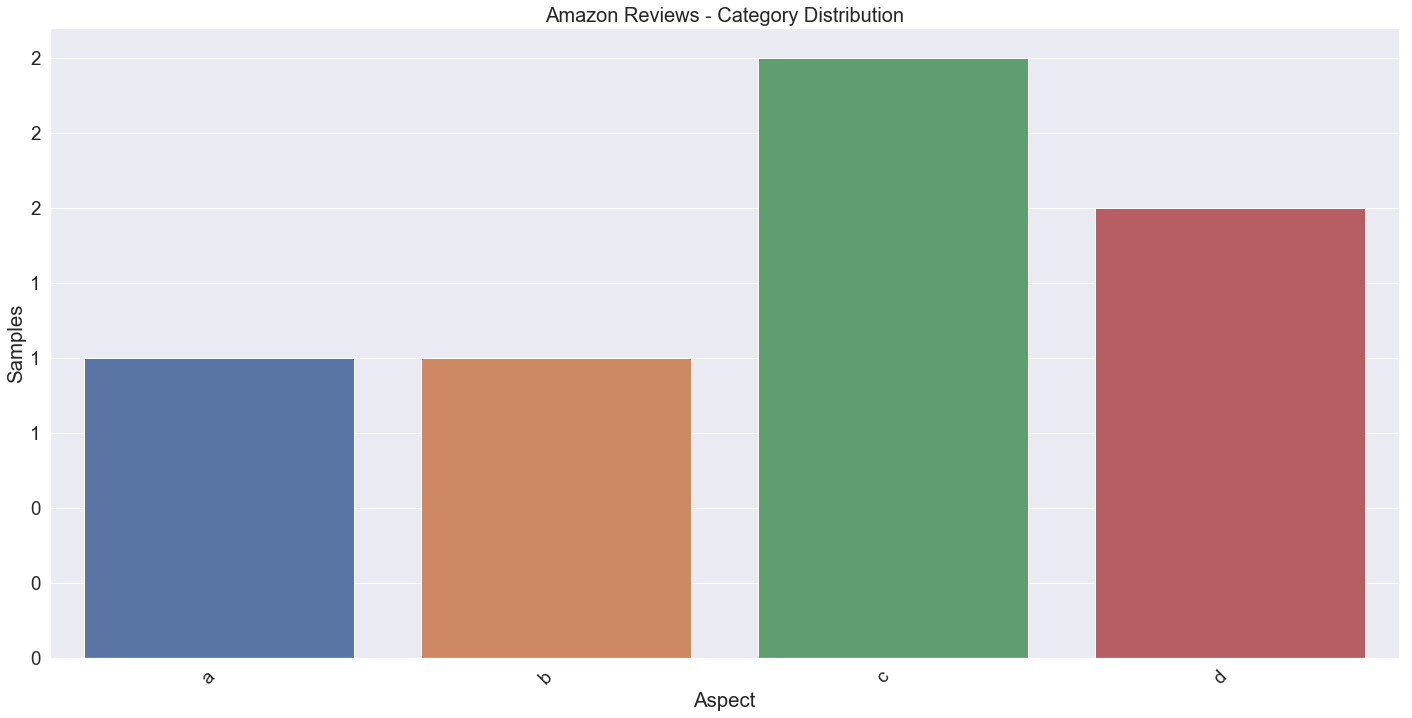

In [7]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_test, x='Aspect', y='Samples')
plt.title(f"Amazon Reviews - Category Distribution", fontsize=20) 
plt.xticks(rotation=45, ha="right")
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Amazon > Organic Transfer

In [2]:
path = os.path.join("C:\\Users\\felix\\OneDrive\\Studium\\Studium\\6. Semester\\MA\\Project\\Results\\TransferLearning\\TransferAmazonOrganic\\02\\df.csv")
df_transfer = pd.read_csv(path)
df_transfer['type'] = df_transfer.apply(lambda r: 'ABSA-T + LM-H + FT (Transfer)',axis=1)
df_transfer['epoch'] = df_transfer.apply(lambda r: r['epoch'] + 1,axis=1)

df_transfer

,Unnamed: 0,epoch,head category,head name,is general,iteration,iterator type,metric type,value,type
0,0,2.0,NaN,GMO: environment,0.0,4340.0,validation,macro f1,0.000000,ABSA-T + LM-H + FT (Transfer)
1,1,2.0,n/a,GMO: environment,0.0,4340.0,validation,f1,0.998505,ABSA-T + LM-H + FT (Transfer)
2,2,2.0,n/a,GMO: environment,0.0,4340.0,validation,precission,1.000000,ABSA-T + LM-H + FT (Transfer)
3,3,2.0,n/a,GMO: environment,0.0,4340.0,validation,recall,0.997015,ABSA-T + LM-H + FT (Transfer)
4,4,2.0,neutral,GMO: environment,0.0,4340.0,validation,f1,0.000000,ABSA-T + LM-H + FT (Transfer)
5,5,2.0,neutral,GMO: environment,0.0,4340.0,validation,precission,0.000000,ABSA-T + LM-H + FT (Transfer)
6,6,2.0,neutral,GMO: environment,0.0,4340.0,validation,recall,0.000000,ABSA-T + LM-H + FT (Transfer)
7,7,2.0,positive,GMO: environment,0.0,4340.0,validation,f1,0.000000,ABSA-T + LM-H + FT (Transfer)
8,8,2.0,positive,GMO: environment,0.0,4340.0,validation,precission,0.000000,ABSA-T + LM-H + FT (Transfer)
9,9,2.0,positive,GMO: environment,0.0,4340.0,validation,recall,0.000000,ABSA-T + LM-H + FT (Transfer)


In [3]:
path = os.path.join("C:\\Users\\felix\\OneDrive\\Studium\\Studium\\6. Semester\\MA\\Project\\Results\\TransferLearning\\Organic_Transfer_Baseline\\20190501\\df.csv")
df_baseline = pd.read_csv(path)
df_baseline['type'] = df_baseline.apply(lambda r: 'ABSA-T + LM-H + FT (Baseline)',axis=1)
df_baseline['epoch'] = df_baseline.apply(lambda r: r['epoch'] + 1,axis=1)

df_baseline

,Unnamed: 0,epoch,head category,head name,is general,iteration,iterator type,metric type,value,type
0,0,2.0,NaN,GMO: environment,0.0,4340.0,validation,macro f1,0.000000,ABSA-T + LM-H + FT (Baseline)
1,1,2.0,n/a,GMO: environment,0.0,4340.0,validation,f1,0.998505,ABSA-T + LM-H + FT (Baseline)
2,2,2.0,n/a,GMO: environment,0.0,4340.0,validation,precission,1.000000,ABSA-T + LM-H + FT (Baseline)
3,3,2.0,n/a,GMO: environment,0.0,4340.0,validation,recall,0.997015,ABSA-T + LM-H + FT (Baseline)
4,4,2.0,neutral,GMO: environment,0.0,4340.0,validation,f1,0.000000,ABSA-T + LM-H + FT (Baseline)
5,5,2.0,neutral,GMO: environment,0.0,4340.0,validation,precission,0.000000,ABSA-T + LM-H + FT (Baseline)
6,6,2.0,neutral,GMO: environment,0.0,4340.0,validation,recall,0.000000,ABSA-T + LM-H + FT (Baseline)
7,7,2.0,positive,GMO: environment,0.0,4340.0,validation,f1,0.000000,ABSA-T + LM-H + FT (Baseline)
8,8,2.0,positive,GMO: environment,0.0,4340.0,validation,precission,0.000000,ABSA-T + LM-H + FT (Baseline)
9,9,2.0,positive,GMO: environment,0.0,4340.0,validation,recall,0.000000,ABSA-T + LM-H + FT (Baseline)


In [4]:
df_combined = df_transfer.append(df_baseline)
df_combined

,Unnamed: 0,epoch,head category,head name,is general,iteration,iterator type,metric type,value,type
0,0,2.0,NaN,GMO: environment,0.0,4340.0,validation,macro f1,0.000000,ABSA-T + LM-H + FT (Transfer)
1,1,2.0,n/a,GMO: environment,0.0,4340.0,validation,f1,0.998505,ABSA-T + LM-H + FT (Transfer)
2,2,2.0,n/a,GMO: environment,0.0,4340.0,validation,precission,1.000000,ABSA-T + LM-H + FT (Transfer)
3,3,2.0,n/a,GMO: environment,0.0,4340.0,validation,recall,0.997015,ABSA-T + LM-H + FT (Transfer)
4,4,2.0,neutral,GMO: environment,0.0,4340.0,validation,f1,0.000000,ABSA-T + LM-H + FT (Transfer)
5,5,2.0,neutral,GMO: environment,0.0,4340.0,validation,precission,0.000000,ABSA-T + LM-H + FT (Transfer)
6,6,2.0,neutral,GMO: environment,0.0,4340.0,validation,recall,0.000000,ABSA-T + LM-H + FT (Transfer)
7,7,2.0,positive,GMO: environment,0.0,4340.0,validation,f1,0.000000,ABSA-T + LM-H + FT (Transfer)
8,8,2.0,positive,GMO: environment,0.0,4340.0,validation,precission,0.000000,ABSA-T + LM-H + FT (Transfer)
9,9,2.0,positive,GMO: environment,0.0,4340.0,validation,recall,0.000000,ABSA-T + LM-H + FT (Transfer)


In [5]:
df_combined.groupby('head name').count()

,Unnamed: 0,epoch,head category,is general,iteration,iterator type,metric type,value,type
head name,,,,,,,,,
GMO: environment,384,384,288,384,384,384,384,384,384
GMO: experienced quality,384,384,288,384,384,384,384,384,384
GMO: general,384,384,288,384,384,384,384,384,384
GMO: price,384,384,288,384,384,384,384,384,384
GMO: safety and healthiness,384,384,288,384,384,384,384,384,384
GMO: trustworthy sources,384,384,288,384,384,384,384,384,384
conventional: environment,384,384,288,384,384,384,384,384,384
conventional: experienced quality,384,384,288,384,384,384,384,384,384
conventional: general,384,384,288,384,384,384,384,384,384


In [6]:
f1_series = (df_combined['metric type']=='micro f1')&(df_combined['is general'] == 1.0)
df_combined[f1_series]

,Unnamed: 0,epoch,head category,head name,is general,iteration,iterator type,metric type,value,type
290,290,1.0,NaN,NaN,1.0,4340.0,validation,micro f1,0.000000,ABSA-T + LM-H + FT (Transfer)
582,582,2.0,NaN,NaN,1.0,8680.0,validation,micro f1,0.010959,ABSA-T + LM-H + FT (Transfer)
874,874,3.0,NaN,NaN,1.0,13020.0,validation,micro f1,0.055980,ABSA-T + LM-H + FT (Transfer)
1166,1166,4.0,NaN,NaN,1.0,17360.0,validation,micro f1,0.204724,ABSA-T + LM-H + FT (Transfer)
1458,1458,5.0,NaN,NaN,1.0,21700.0,validation,micro f1,0.277955,ABSA-T + LM-H + FT (Transfer)
1750,1750,6.0,NaN,NaN,1.0,26040.0,validation,micro f1,0.289406,ABSA-T + LM-H + FT (Transfer)
2042,2042,7.0,NaN,NaN,1.0,30380.0,validation,micro f1,0.277372,ABSA-T + LM-H + FT (Transfer)
2334,2334,8.0,NaN,NaN,1.0,34720.0,validation,micro f1,0.286044,ABSA-T + LM-H + FT (Transfer)
2626,2626,9.0,NaN,NaN,1.0,39060.0,validation,micro f1,0.283482,ABSA-T + LM-H + FT (Transfer)
2918,2918,10.0,NaN,NaN,1.0,43400.0,validation,micro f1,0.298441,ABSA-T + LM-H + FT (Transfer)


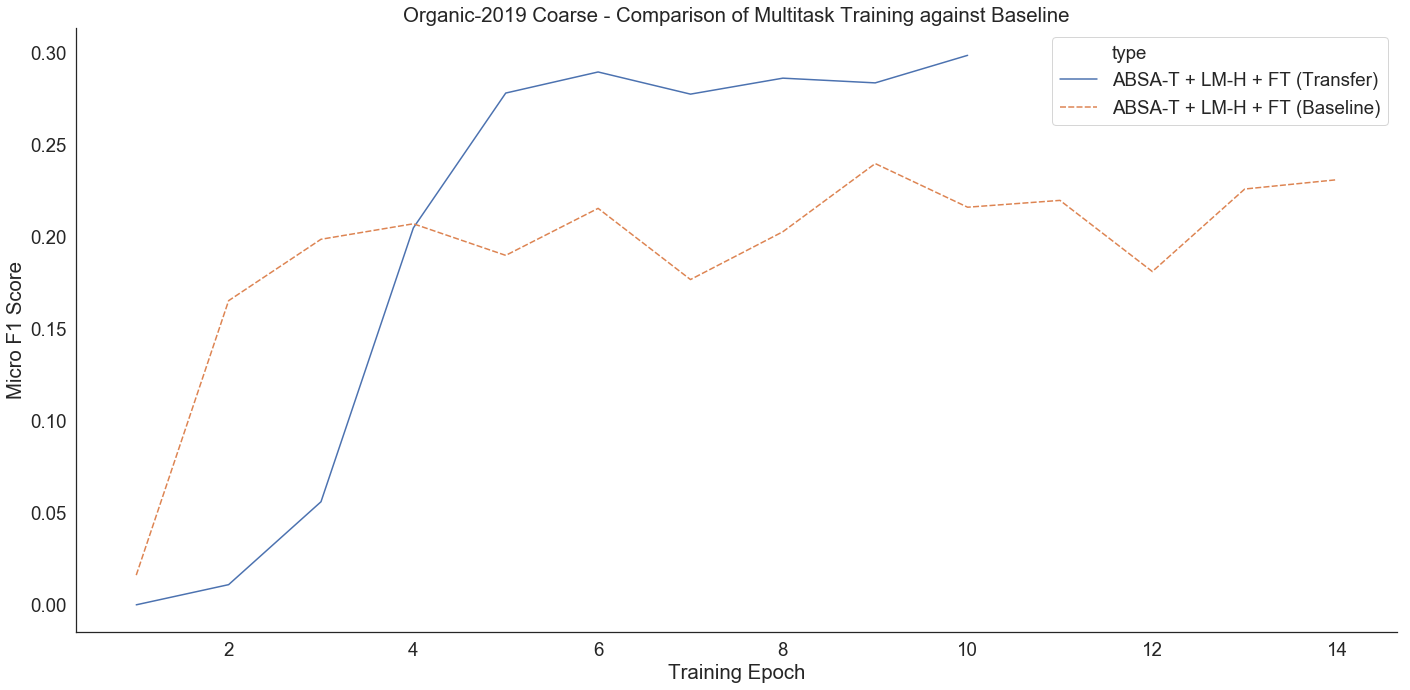

In [7]:

sns.set_color_codes()
sns.set_context("paper")
sns.set(rc={"font.size":18,"axes.labelsize":22})
sns.set(font_scale=1.7)
sns.set_style("white")

plt.figure(figsize=(20,10))

sns.lineplot(x="epoch", y="value", hue="type", style="type", data=df_combined[f1_series])
sns.despine()

plt.title('Organic-2019 Coarse - Comparison of Multitask Training against Baseline')
plt.ylabel('Micro F1 Score')
plt.xlabel('Training Epoch')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'Thesis', 'figures', '06_results', '06_org_coarse_transfer.pdf'))